# Ch02. Spirograph

## 1. 원 그리기

In [1]:
import math
import turtle

def drawCircleTurtle(x,y,r):
    #펜을 땐다
    turtle.up()
    
    #펜의 위치를 정한다
    turtle.setpos(x+r, y)
    
    #펜을 내린다
    turtle.down()
    
    #펜을 움직인다
    for i in range(0,365,5):
        a = math.radians(i)
        turtle.setpos(x + r*math.cos(a), y + r*math.sin(a))

In [2]:
# drawCircleTurtle(100,100,50)
# turtle.bye()

## 2. 스파이로 그래프

In [3]:
import math
import turtle

class Spiro:
    def __init__(self,xc,yc,col,R,r,l):
        self.t = turtle.Turtle()
        self.t.shape('turtle')
        self.step = 5
        self.drawingComplete = False
        self.setparams(xc,yc,col,R,r,l)
        self.restart()
        
        
    def setparams(self,xc,yc,col,R,r,l):
        self.xc = xc
        self.yc = yc
        self.col = col
        self.R = int(R)
        self.r = int(r)
        self.l = l
        
        #지름,반지름 최대공약수
        gcdVal = math.gcd(self.r, self.R)
        
        #최대공약수에 대한 반지름 비율
        self.nRot = self.r//gcdVal
        
        #지름에 대한 반지름 비율
        self.k = r/float(R)
        
        #색깔
        self.t.color(*col)
        
        #현재각도
        self.a = 0
        
        
    def restart(self):
        self.drawingComplete = False
        self.t.showturtle()
        self.t.up()
        R,k,l = self.R, self.k, self.l
        a = 0.0
        x = R*( (1-k)*math.cos(a) + l*k*math.cos((1-k)*a/k) )
        y = R*( (1-k)*math.sin(a) + l*k*math.sin((1-k)*a/k) )
        self.t.setpos(self.xc + x, self.yc + y)
        self.t.down()
        
        
    def draw(self):
        R,k,l = self.R, self.k, self.l
        for i in range(0, 360*self.nRot+1, self.step):
            a = math.radians(i)
            x = R*( (1-k)*math.cos(a) + l*k*math.cos((1-k)*a/k) )
            y = R*( (1-k)*math.sin(a) + l*k*math.sin((1-k)*a/k) )
            self.t.setpos(self.xc + x, self.yc + y)
        self.t.hideturtle()
        
        
    def update(self):
        if self.drawingComplete:
            return
        
        self.a += self.step
        
        R,k,l = self.R, self.k, self.l
        a = math.radians(self.a)
        x = R*( (1-k)*math.cos(a) + l*k*math.cos((1-k)*a/k) )
        y = R*( (1-k)*math.sin(a) + l*k*math.sin((1-k)*a/k) )
        self.t.setpos(self.xc + x, self.yc + y)
        if self.a >= 360*self.nRot:
            self.drawingComplete = True
            self.t.hideturtle()
        

## 3. 그래프 그리기

In [4]:
import random
import PIL.Image

# Canvas Size
turtle.setup(width=0.5)
width = turtle.window_width()
height = turtle.window_height()
# Radius of outer circle
R = random.randint(50, min(width, height)//2)
# Radius of inner circle
r = random.randint(10, 9*R//10)
# Ratio of hole distance to r
l = random.uniform(0.3, 0.9)
# Position of outer circle
xc = random.randint(0, width//2)
yc = random.randint(0, height//2)
# Line Color
col = (random.random(), random.random(), random.random())
    
# Init Spiro
spiro = Spiro(xc,yc,col,R,r,l)
    
def update():    
    if spiro.drawingComplete:
        epsfile = 'spiro.eps'
        imgfile = 'spiro.png'
        canvas = turtle.getcanvas()
        canvas.postscript(file=epsfile)
        img = PIL.Image.open(epsfile)
        img.save(imgfile, 'png')
        turtle.bye()
    else:
        spiro.update()
        turtle.ontimer(update, 1)

In [5]:
update()
turtle.mainloop()

## 4. 그래프 출력

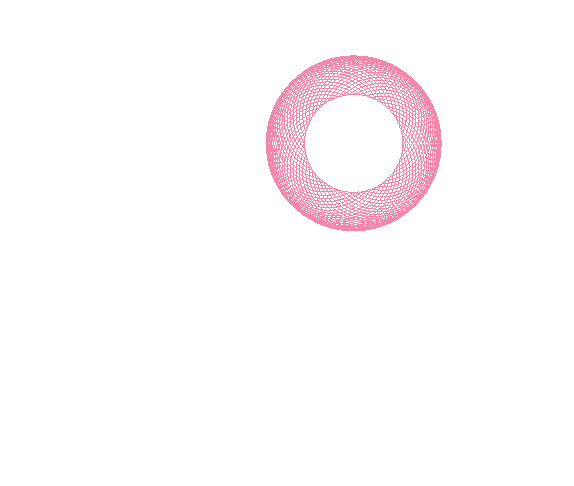

In [6]:
import IPython.display
IPython.display.Image(filename='spiro.png')